<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/fuzzylogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy logické systémy

> **Doporučené video**
> 
> [Machine Intelligence - Lecture 17 (Fuzzy Logic, Fuzzy Inference) 1h 22min](https://www.youtube.com/watch?v=TReelsVxWxg)

## Booleova algebra

Booleova algebra předpokládá, že každý výrok je buď pravdivý nebo nepravdivý.
Číslo X je buď rovno 0 nebo není. Žádné "mezihodnoty" neexistují.

Možné logické proměnné jsou tedy `True` a `False`

Pravdivostní tabulka pro operátor AND

| X | Y | (X and Y)|
|:-:|:-:|:----:|
| 0 | 0 |   0  |
| 0 | 1 |   0  |
| 1 | 0 |   0  |
| 1 | 1 |   1  |

Pravdivostní tabulka pro operátor OR

| X | Y | (X or Y)|
|:-:|:-:|:----:|
| 0 | 0 |   0  |
| 0 | 1 |   1  |
| 1 | 0 |   1  |
| 1 | 1 |   1  |


In [ ]:
def createBoolTest(trueValue, falseValue):
    def test(func):
        print(func)
        print('True\tTrue\t', func(trueValue)(trueValue) == trueValue)
        print('False\tTrue\t', func(falseValue)(trueValue) == trueValue)
        print('True\tFalse\t', func(trueValue)(falseValue) == trueValue)
        print('False\tFalse\t', func(falseValue)(falseValue) == trueValue)
    return test

In [ ]:
boolTest = createBoolTest(True, False)
def And(a):
    def AndAnd(b):
        return a & b
    return AndAnd

def Or(a):
    def OrOr(b):
        return a | b
    return OrOr

boolTest(Or)
print('-'*10)
boolTest(And)

<function Or at 0x7ff7cc1c13a0>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function And at 0x7ff7cc1c1280>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


## Fuzzy algebra

Fuzzy algebra předpokládá, že každá hodnota na intervalu $<0;1>$ je možnou / přípustnou hodnotou.

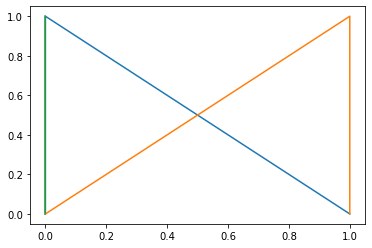

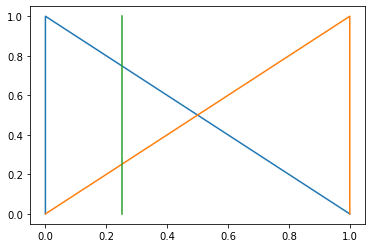

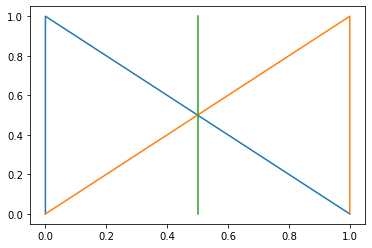

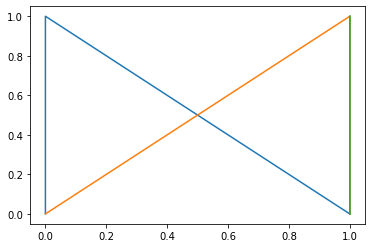

In [ ]:
import matplotlib.pyplot as plt

def plotFuzzyVariable(value):
    plt.plot([0, 0, 1, 1], [0, 1, 0, 0])
    plt.plot([0, 0, 1, 1], [0, 0, 1, 0])
    plt.plot([value, value], [0, 1])
    plt.show()

plotFuzzyVariable(0)
plotFuzzyVariable(0.25)
plotFuzzyVariable(0.5)
plotFuzzyVariable(1)

In [ ]:
def fuzzyAnd(a):
    def fuzzyAndAnd(b):
        return min(a, b)
    return fuzzyAndAnd

def fuzzyOr(a):
    def fuzzyOrOr(b):
        return max(a, b)
    return fuzzyOrOr

boolTest = createBoolTest(1, 0)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)


<function fuzzyOr at 0x7ff7cc1c1ca0>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function fuzzyAnd at 0x7ff7cc1c1b80>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


In [ ]:
boolTest = createBoolTest(0.7, 0.3)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)

<function fuzzyOr at 0x7ff7cc1c1ca0>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function fuzzyAnd at 0x7ff7cc1c1b80>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


In [ ]:
boolTest = createBoolTest(0.51, 0.49)

boolTest(fuzzyOr)
print('-'*10)
boolTest(fuzzyAnd)

<function fuzzyOr at 0x7ff7cc1c1ca0>
True	True	 True
False	True	 True
True	False	 True
False	False	 False
----------
<function fuzzyAnd at 0x7ff7cc1c1b80>
True	True	 True
False	True	 False
True	False	 False
False	False	 False


## Universum

[0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.5, 1]


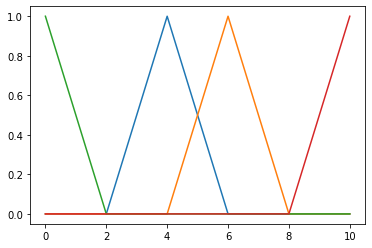

In [ ]:
fuzzyUniversum = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
def fuzzyVectorCreator(values=fuzzyUniversum):
    def resultFunc(value, leftDelta=2, rightDelta=2):
        leftValue = max(value - leftDelta, values[0])
        rightValue = min(value + rightDelta, values[-1])
        
        result = []
        for item in values:
            if item < leftValue:
                result.append(0)
            elif item == value:
                result.append(1)
            elif item < value:
                resultItem = (item - leftValue) / leftDelta
                result.append(resultItem)
            elif item <= rightValue:
                resultItem = (rightValue - item) / rightDelta
                result.append(resultItem)
                pass
            else:
                result.append(0)
        return result
    return resultFunc

fuzzyMapper = fuzzyVectorCreator()
fuzzyVectorA = fuzzyMapper(4.0)
fuzzyVectorB = fuzzyMapper(6.0)
fuzzyVectorC = fuzzyMapper(0.0)
fuzzyVectorD = fuzzyMapper(10)

plt.plot(fuzzyUniversum, fuzzyVectorA)
plt.plot(fuzzyUniversum, fuzzyVectorB)
plt.plot(fuzzyUniversum, fuzzyVectorC)
plt.plot(fuzzyUniversum, fuzzyVectorD)
print(fuzzyVectorD)

## Názvosloví

Antecedent = vstup

Consequent = výstup (řešení)



## Pravidla

Situace v restauraci, rozhodování o spropitném.
Hodnotíme jídlo a obsluhu. 

Pro hodnocení jídla volíme stupnici:
- špatné
- dobré
- vynikající

Pro hodnocení obsluhy volíme stupnici:
- špatná
- dobrá
- skvělá

Pro spropitné si stanovujeme tato pravidla:
- **jestliže** jídlo bylo vynikající **nebo** obsluha byla skvělá je spropitné **vysoké**
- **jestliže** obsluha byla dobrá je spropitné **střední**
- **jestliže** jídlo bylo špatné **a** obsluha byla špatná je spropitné **nízké**

Spropitné je v rozsahu 0% - 25% $\in <0.0;0.25>$
- **vysoké** je 0.250
- **střední** je 0.125
- **nízké** je 0.000


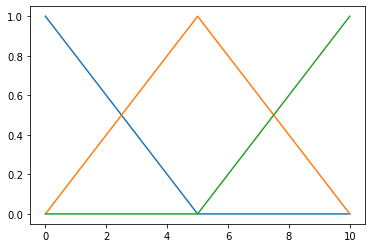

In [ ]:
fuzzyMapper = fuzzyVectorCreator()
badFood = fuzzyMapper(0, 5, 5)
goodFood = fuzzyMapper(5, 5, 5)
excelentFood = fuzzyMapper(10, 5, 5)
plt.plot(badFood)
plt.plot(goodFood)
plt.plot(excelentFood)

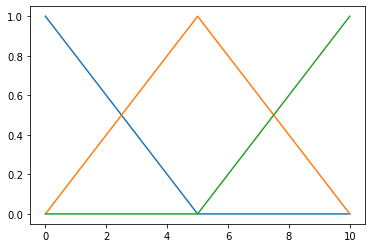

In [ ]:
fuzzyMapper = fuzzyVectorCreator()
badService = fuzzyMapper(0, 5, 5)
goodService = fuzzyMapper(5, 5, 5)
excelentService = fuzzyMapper(10, 5, 5)
plt.plot(badService)
plt.plot(goodService)
plt.plot(excelentService)

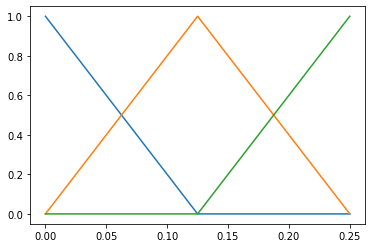

In [ ]:
tipUniversum = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]
fuzzyMapper = fuzzyVectorCreator(tipUniversum)
lowTip = fuzzyMapper(0, 0.125, 0.125)
middleTip = fuzzyMapper(0.125, 0.125, 0.125)
highTip = fuzzyMapper(0.25, 0.125, 0.125)
plt.plot(tipUniversum, lowTip)
plt.plot(tipUniversum, middleTip)
plt.plot(tipUniversum, highTip)

0.0
0.03999999999999987
0.9600000000000002


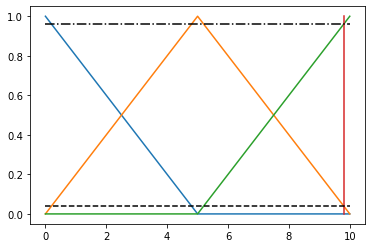

In [ ]:
import numpy as np

def calculateValue(value, universum, fuzzyValue):
    return np.interp(value, universum, fuzzyValue)

serviceLevel = 9.8 # on the scale 0 - 10
isBadService = calculateValue(serviceLevel, fuzzyUniversum, badService)
isGoodService = calculateValue(serviceLevel, fuzzyUniversum, goodService)
isExcelentService = calculateValue(serviceLevel, fuzzyUniversum, excelentService)
print(isBadService)
print(isGoodService)
print(isExcelentService)
plt.plot(fuzzyUniversum, badService)
plt.plot(fuzzyUniversum, goodService)
plt.plot(fuzzyUniversum, excelentService)
plt.plot([serviceLevel, serviceLevel], [0, 1])
plt.plot([0, 10], [isGoodService, isGoodService], '--k')
plt.plot([0, 10], [isExcelentService, isExcelentService], '-.k')

0.0
0.7
0.30000000000000004


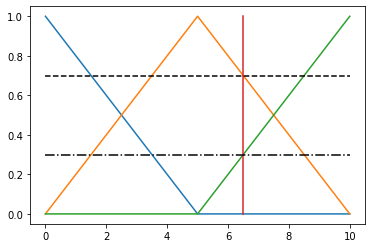

In [ ]:
foodLevel = 6.5

isBadFood = calculateValue(foodLevel, fuzzyUniversum, badFood)
isGoodFood = calculateValue(foodLevel, fuzzyUniversum, goodFood)
isExcelentFood = calculateValue(foodLevel, fuzzyUniversum, excelentFood)
print(isBadFood)
print(isGoodFood)
print(isExcelentFood)
plt.plot(fuzzyUniversum, badFood)
plt.plot(fuzzyUniversum, goodFood)
plt.plot(fuzzyUniversum, excelentFood)
plt.plot([foodLevel, foodLevel], [0, 1])
plt.plot([0, 10], [isGoodFood, isGoodFood], '--k')
plt.plot([0, 10], [isExcelentFood, isExcelentFood], '-.k')

Pro spropitné si stanovujeme tato pravidla:
- **jestliže** jídlo bylo vynikající **nebo** obsluha byla skvělá je spropitné **vysoké**
- **jestliže** obsluha byla dobrá je spropitné **střední**
- **jestliže** jídlo bylo špatné **a** obsluha byla špatná je spropitné **nízké**

0.9600000000000002
0.03999999999999987
0.0


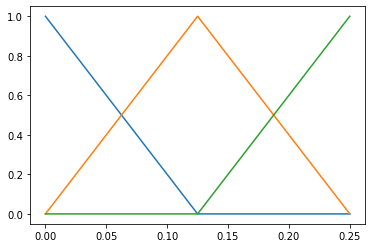

In [ ]:
def fuzzyAnd(a, b):
    return min(a, b)

def fuzzyOr(a, b):
    return max(a, b)

isLowTip = fuzzyAnd(isBadService, isBadFood)
isMiddleTip = isGoodService
isHighTip = fuzzyOr(isExcelentService, isExcelentFood)

print(isHighTip)
print(isMiddleTip)
print(isLowTip)
plt.plot(tipUniversum, lowTip)
plt.plot(tipUniversum, middleTip)
plt.plot(tipUniversum, highTip)

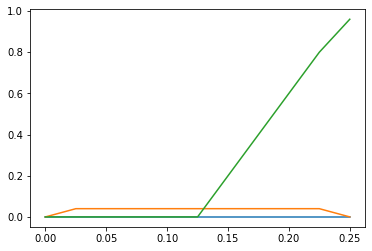

In [ ]:
def activateRule(activationLevel, fuzzyVector):
    return [min(activationLevel, item) for item in fuzzyVector]

lowTipFuzzy = activateRule(isLowTip, lowTip)
middleTipFuzzy = activateRule(isMiddleTip, middleTip)
highTipFuzzy = activateRule(isHighTip, highTip)

plt.plot(tipUniversum, lowTipFuzzy)
plt.plot(tipUniversum, middleTipFuzzy)
plt.plot(tipUniversum, highTipFuzzy)

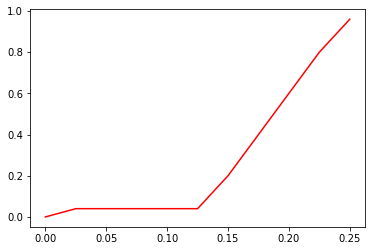

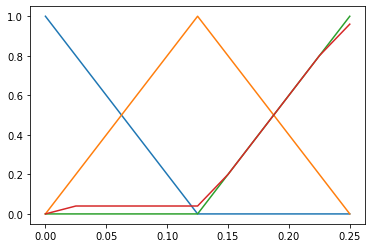

In [ ]:
def calculateResult(*fuzzyVariables):
    result = []
    for items in zip(*fuzzyVariables):
        m = max(items)
        result.append(m)
    return result

result = calculateResult(lowTipFuzzy, middleTipFuzzy, highTipFuzzy)
plt.plot(tipUniversum, result, '-r')
plt.show()

plt.plot(tipUniversum, lowTip)
plt.plot(tipUniversum, middleTip)
plt.plot(tipUniversum, highTip)
plt.plot(tipUniversum, result)

## scikit fuzzy

In [ ]:
!pip install scikit-fuzzy

  Using cached scikit_fuzzy-0.4.2-py3-none-any.whl


https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
print(active_rule1)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, tip_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
active_rule2 = serv_level_md
print(active_rule2)
tip_activation_md = np.fmin(active_rule2, tip_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
print(active_rule3)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
print(tip)
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Příklad

Cena
- do 10 MKč
- 10 - 11 MKč
- 11 - 11.5 MKč
- více než 11.5 MKč

Doba dodávky
- 76 dnů
- 77 dnů
- 80 dnů
- 92 dnů

Záruka
- 60 měsíců
- 72 měsíců
- 90 měsíců

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.8MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=913755fa9ac41f22d8124681e71c31f6d056f4c2bb218174a27d5645b22a1494
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

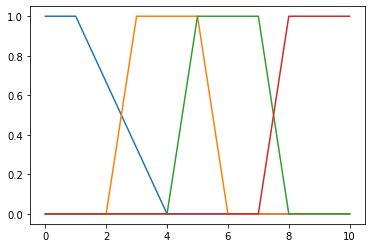

In [7]:
universumCena = np.arange(0, 11, 1)

cena10 = fuzz.trapmf(universumCena, [0, 0, 1, 4])
cena11 = fuzz.trapmf(universumCena, [2, 3, 5, 6])
cena115 = fuzz.trapmf(universumCena, [4, 5, 7, 8])
cena12 = fuzz.trapmf(universumCena, [7, 8, 10, 10])

plt.plot(universumCena, cena10)
plt.plot(universumCena, cena11)
plt.plot(universumCena, cena115)
plt.plot(universumCena, cena12)

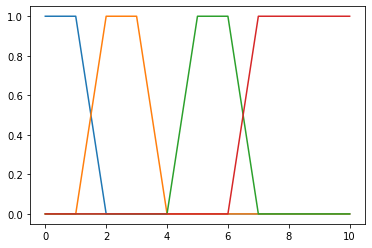

In [8]:
universumDoba = np.arange(0, 11, 1)

doba76 = fuzz.trapmf(universumDoba, [0, 0, 1, 2])
doba77 = fuzz.trapmf(universumDoba, [1, 2, 3, 4])
doba80 = fuzz.trapmf(universumDoba, [4, 5, 6, 7])
doba92 = fuzz.trapmf(universumDoba, [6, 7, 10, 10])

plt.plot(universumDoba, doba76)
plt.plot(universumDoba, doba77)
plt.plot(universumDoba, doba80)
plt.plot(universumDoba, doba92)

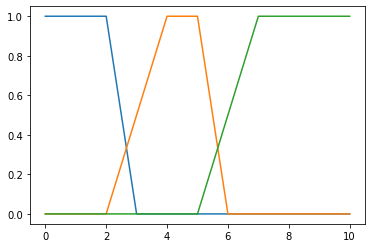

In [9]:
universumZaruka = np.arange(0, 11, 1)

zaruka60 = fuzz.trapmf(universumZaruka, [0, 0, 2, 3])
zaruka72 = fuzz.trapmf(universumZaruka, [2, 4, 5, 6])
zaruka90 = fuzz.trapmf(universumZaruka, [5, 7, 10, 10])

plt.plot(universumZaruka, zaruka60)
plt.plot(universumZaruka, zaruka72)
plt.plot(universumZaruka, zaruka90)